In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as t

from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from scipy.integrate import solve_ivp

plt.rcParams.update({'font.size': 12})

-----------
## Jodova ura
-----------

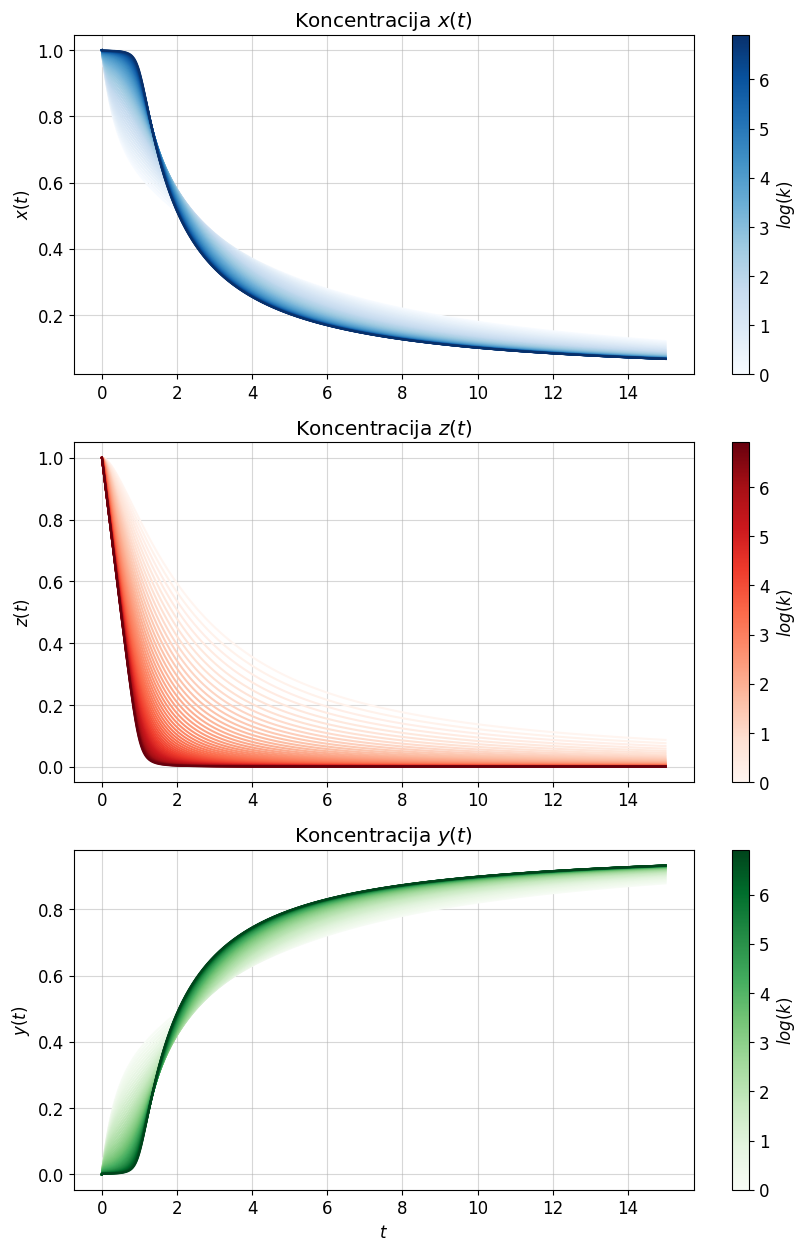

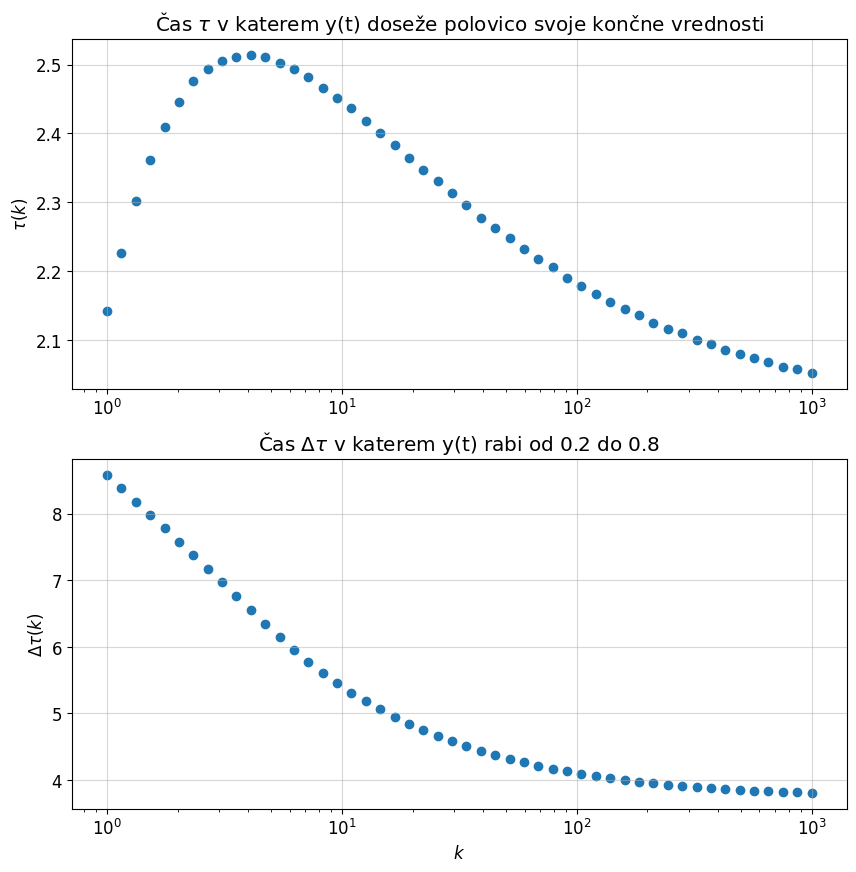

In [74]:
# Sistem of diferential equations

def f(t, y, k):
    x, y, z = y

    # Compute the derivatives
    dxdt = -x**2 + k * y * z**2
    dydt = x**2 - k * y * z**2
    dzdt = -k * y * z**2

    return [dxdt, dydt, dzdt]

# Parameters
ks = np.logspace(0, 3)


# Initial values and desired time span
initial_y = 0.0
initial_x = 1. - initial_y/2.
initial_z = 1. - initial_y/2.
y0 = [initial_x, initial_y, initial_z]

t_initial = 0.
t_final = 15.
num_points = 5000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)

# Time of the clock
taus = np.zeros_like(ks)
deltaus = np.zeros_like(ks)

fig1 = plt.figure(figsize=(10,15))
fig2 = plt.figure(figsize=(10,10))

ax1 = fig1.add_subplot(3, 1, 1)
ax1.grid(alpha=0.5)
ax1.set_title(r'Koncentracija $x(t)$')
ax1.set_ylabel(r'$x(t)$')

ax2 = fig1.add_subplot(3, 1, 2)
ax2.grid(alpha=0.5)
ax2.set_title(r'Koncentracija $z(t)$')
ax2.set_ylabel(r'$z(t)$')

ax3 = fig1.add_subplot(3, 1, 3)
ax3.grid(alpha=0.5)
ax3.set_title(r'Koncentracija $y(t)$')
ax3.set_ylabel(r'$y(t)$')
ax3.set_xlabel(r'$t$')

ax4 = fig2.add_subplot(2, 1, 1)
ax4.grid(alpha=0.5)
ax4.set_xscale('log')
ax4.set_title(r'Čas $\tau$ v katerem y(t) doseže polovico svoje končne vrednosti')
ax4.set_ylabel(r'$\tau(k)$')

ax5 = fig2.add_subplot(2, 1, 2)
ax5.grid(alpha=0.5)
ax5.set_xscale('log')
ax5.set_title(r'Čas $\Delta\tau$ v katerem y(t) rabi od 0.2 do 0.8')
ax5.set_ylabel(r'$\Delta\tau(k)$')
ax5.set_xlabel(r'$k$')

cmap1 = get_cmap('Blues')
cmap2 = get_cmap('Reds')
cmap3 = get_cmap('Greens')
norm = Normalize(vmin=min(np.log(ks)), vmax=max(np.log(ks)))

for i, k in enumerate(ks):
    color1 = cmap1(norm(np.log(k)))
    color2 = cmap2(norm(np.log(k)))
    color3 = cmap3(norm(np.log(k)))

    solution = solve_ivp(f, t_span, y0, t_eval=ts, method='DOP853', args=(k,))
    
    x_solution, y_solution, z_solution = solution.y

    index = np.argwhere(y_solution > 0.5)[0][0]
    taus[i] = ts[index]

    index1 = np.argwhere(y_solution > 0.2)[0][0]
    index2 = np.argwhere(y_solution > 0.8)[0][0]
    deltaus[i] = ts[index2] - ts[index1]

    ax1.plot(ts, x_solution, color=color1)
    ax2.plot(ts, z_solution, color=color2)
    ax3.plot(ts, y_solution, color=color3)

ax4.scatter(ks, taus)
ax5.scatter(ks, deltaus)

sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, label=r'$log(k)$', ax=[ax1])
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, label=r'$log(k)$', ax=[ax2])
sm3 = plt.cm.ScalarMappable(cmap=cmap3, norm=norm)
sm3.set_array([])
cbar3 = plt.colorbar(sm3, label=r'$log(k)$', ax=[ax3])